In [1]:
from mat2vec.processing import MaterialsTextProcessor
from gensim.models import Word2Vec
from gensim.models.fasttext import FastText
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

text_processor = MaterialsTextProcessor()

w2v_model = Word2Vec.load("/Users/alucic2/Documents/GitHub/mat2vec/mat2vec/training/models/pretrained_embeddings")

In [2]:
def word_similar():
    while True:
        try:
            word = input("Please enter the material or chemical element that you are interested in exploring \n (phrases should be connected with an underscore):\n").lower()
        except ValueError:
            continue
        if word not in w2v_model.wv.vocab:
            print(f'This word/phrase is not in the vocabulary, please choose a different word')
            continue
        elif word in w2v_model.wv.vocab:
            word = text_processor.normalized_formula(word)
            similar = w2v_model.wv.most_similar(word, topn=20)
        return similar

In [3]:
def analogies():
    word1 = input("Please enter the word (chemical element, material, phrase connected with an underscore) that you are interested in studying analogies to: \n").lower()
    word2 = input ("Please enter the word (chemical element, material, phrase connected with an underscore) that is similar to the earlier word: \n").lower()
    word3 = input("Please enter the word (chemical element, material, phrase connected with an underscore) that you are interested in studying analogies to:\n").lower()
    word_analogous = w2v_model.wv.most_similar(positive=[word1, word2], negative=[word3], topn=1)
    sentence = '{} is to {} as {} is to ...'.format(word1, word2, word3)
    print(sentence)
    return word_analogous

In [4]:
def explore_words():
    st =[]
    while True:
        input_string = input("Please enter the chemical element, material, phrase (connected with an underscore) \n you are interested in exploring/visualizing in connection to other elements/materials:").lower()
        try:
            if input_string not in w2v_model.wv.vocab:
                print('The following is not in the vocabulary:' + ' ' + input_string + ' ' + 'please replace the word')
                continue       
            elif input_string in w2v_model.wv.vocab:
                print(f'The following is in the vocabulary' + ' ' + input_string)
                input_string = text_processor.normalized_formula(input_string)
                st.append(input_string)
                answer = input(f'Would you like to enter more words? Please enter "Yes" or "No"')
                if answer =='Yes' or answer == 'yes':
                    continue
                elif answer == 'No' or answer == 'no':
                    return st
        except ValueError:
            break

In [5]:
def similarity(list):
    similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in list}
    return similar_words

In [6]:
def pca_plot_render(mylist):
    
    words = sum([[k] + v for k, v in mylist.items()], [])
    wvs = w2v_model.wv[words]

    pca = PCA(n_components=2)
    np.set_printoptions(suppress=True)
    P = pca.fit_transform(wvs)
    labels = words

    plt.figure(figsize=(18, 10))
    plt.scatter(P[:, 0], P[:, 1], c='steelblue', edgecolors='g', s=100)
    plt.xlabel('PC1', fontsize=18)
    plt.ylabel('PC2', fontsize=18)
    for label, x, y in zip(labels, P[:, 0], P[:, 1]):
        plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points', fontsize=16)
    plt.show()

In [7]:
def tsne_plot_render(mylist):
    words = sum([[k] + v for k, v in mylist.items()], [])
    wvs = w2v_model.wv[words]
    tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
    np.set_printoptions(suppress=True)
    T = tsne.fit_transform(wvs)
    labels = words

    plt.figure(figsize=(18, 10))
    plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='g', s=100)
    for label, x, y in zip(labels, T[:, 0], T[:, 1]):
        plt.yticks(fontsize=20)
        plt.xticks(fontsize=20)
        plt.annotate(label, xy=(x+0.5, y+0.5), xytext=(0, 0), textcoords='offset points', fontsize=16)

In [8]:
def main():
    word = word_similar()
    print(word)
    st = explore_words()
    similar_words = similarity(st)
    print (similar_words)
    pca_plot_render(similar_words)
    tsne_plot_render(similar_words)

Please enter the material or chemical element that you are interested in exploring 
 (phrases should be connected with an underscore):
thermoelectric
[('thermoelectrics', 0.8435686826705933), ('thermoelectric_properties', 0.8339033126831055), ('thermoelectric_power_generation', 0.7931368947029114), ('thermoelectric_figure_of_merit', 0.791649341583252), ('seebeck_coefficient', 0.7753845453262329), ('thermoelectric_generators', 0.7641353011131287), ('figure_of_merit_ZT', 0.7587920427322388), ('thermoelectricity', 0.7515754699707031), ('Bi2Te3', 0.7480161190032959), ('thermoelectric_modules', 0.7434878945350647), ('zT', 0.7374263405799866), ('thermoelectric_figure_-_of_-_merit', 0.73343425989151), ('seebeck_coefficients', 0.7320309281349182), ('bismuth_telluride', 0.7296704053878784), ('thermoelectric_power_factor', 0.7280790209770203), ('ZT', 0.7209436297416687), ('dimensionless_figure_of_merit', 0.7204320430755615), ('ZT_values', 0.718651533126831), ('thermoelectric_generator', 0.718113

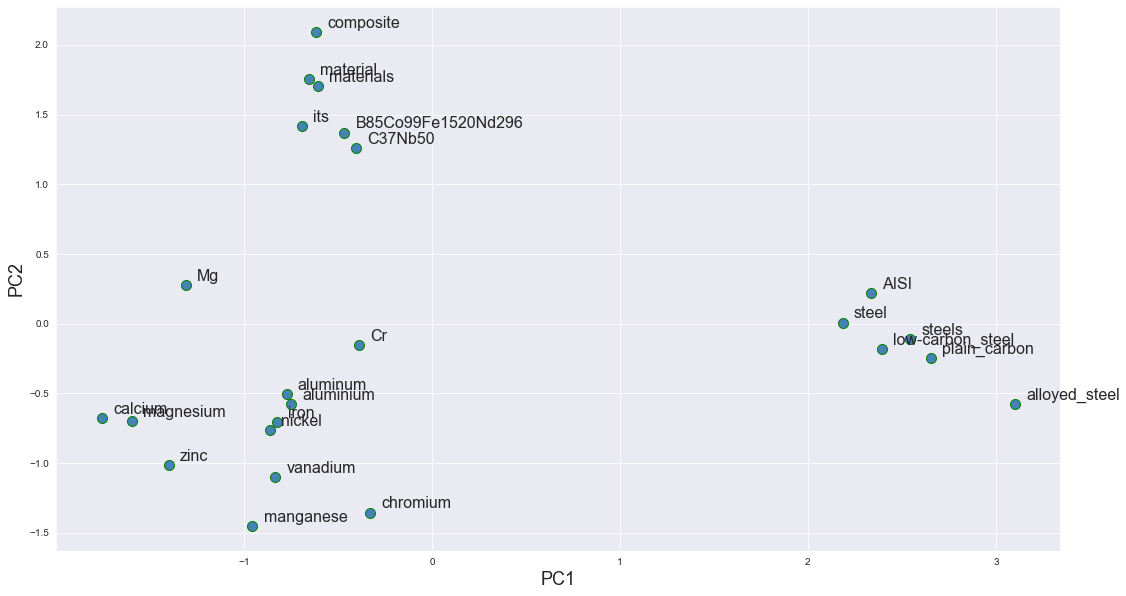

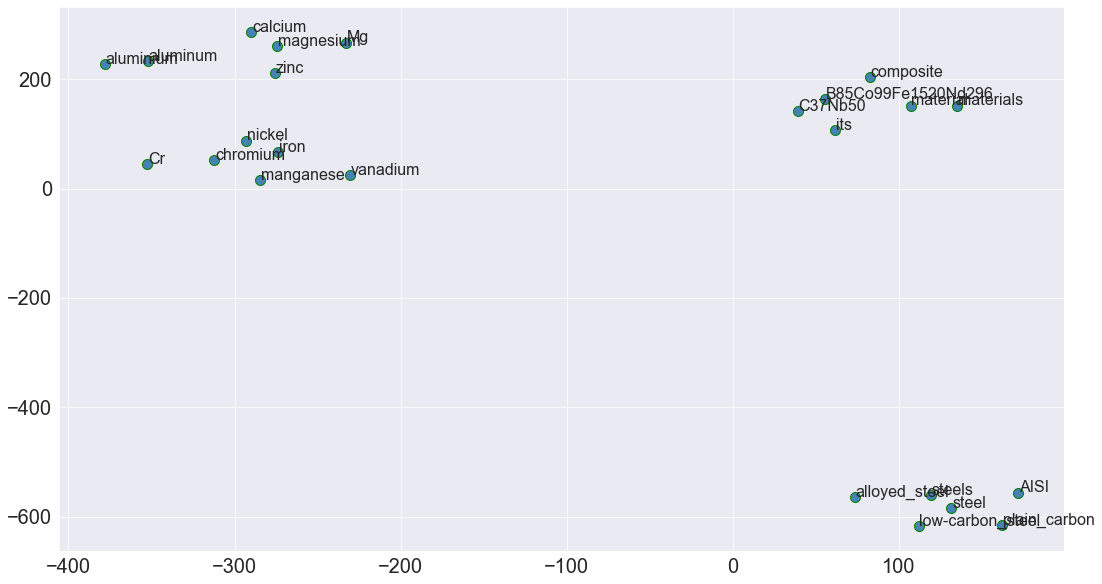

In [9]:
if __name__ == "__main__":
    main()